In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  

In [ ]:
# Plot misclassified images
import pandas as pd

def plot_misclasified_examples(x, true_lables, predicted_lables, n=5, print_misclassified=False):
  misclassified_idx = np.where(predicted_lables != true_lables)[0]
  misclassified_random_idxes = np.random.choice(misclassified_idx, n*n)
  plt.figure(figsize=(10,10))
  for i in range(n*n):
      idx = misclassified_random_idxes[i]
      plt.subplot(n,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[idx], cmap='gray')
      plt.xlabel("True  %s, Pred: %s" % (true_lables[idx], predicted_lables[idx]))
  plt.show()

  if print_misclassified:
    print(pd.DataFrame({'idx':misclassified_random_idxes,
                        'true':true_lables[misclassified_random_idxes],
                        'pred':predicted_lables[misclassified_random_idxes]}))



In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


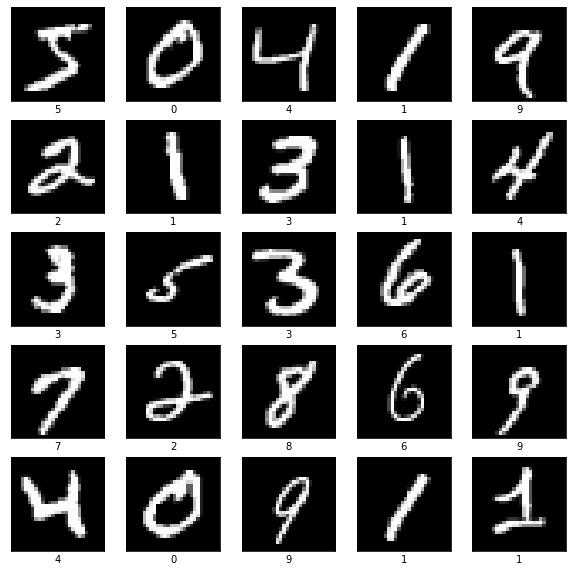

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
%%time

model = tf.keras.Sequential(
    layers=[
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2975 - accuracy: 0.9143 - val_loss: 0.1415 - val_accuracy: 0.9579
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1403 - accuracy: 0.9591 - val_loss: 0.1018 - val_accuracy: 0.9690
Epoch 3/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1038 - accuracy: 0.9683 - val_loss: 0.0914 - val_accuracy: 0.9712
Epoch 4/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0852 - accuracy: 0.9732 - val_loss: 0.0765 - val_accuracy: 0.9760
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0715 - accuracy: 0.9774 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0620 - accuracy: 0.9797 - val_loss: 0.0756 - val_accuracy: 0.9774
CPU times: user 35.7 s, sys: 2.47 s, total: 38.1 s
Wall time: 41.4 s


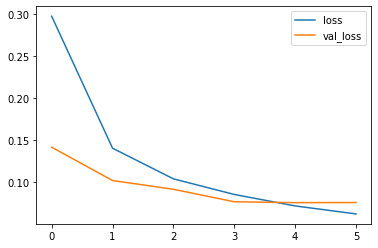

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

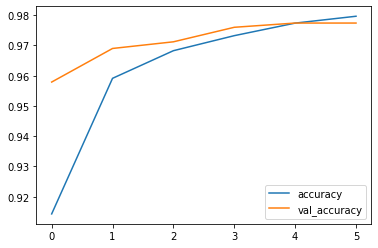

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9774
[0.07561710476875305, 0.977400004863739]


Confusion matrix, without normalization
[[ 969    0    1    0    0    1    5    1    2    1]
 [   0 1124    3    1    0    0    3    0    4    0]
 [   7    0 1005    5    1    0    3    6    5    0]
 [   0    0    4  987    0    6    0    6    2    5]
 [   1    0    4    1  957    0    4    5    1    9]
 [   2    0    0   10    1  868    6    2    2    1]
 [   3    2    2    1    2    6  942    0    0    0]
 [   2    4    9    2    0    0    0 1004    0    7]
 [   4    0    2    9    4    6    3    3  938    5]
 [   2    3    0    7    9    6    0    2    0  980]]


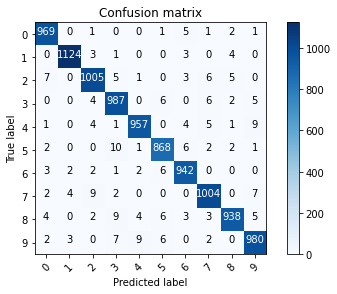

In [ ]:
# plot confucion matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

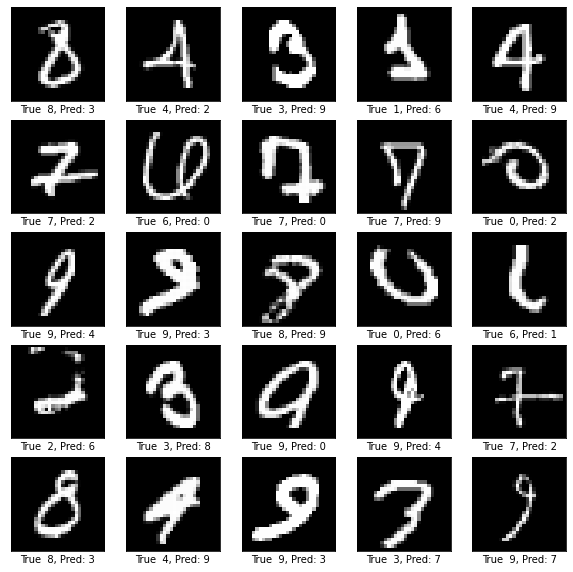

     idx  true  pred
0    591     8     3
1   1751     4     2
2   6011     3     9
3   2266     1     6
4   5926     4     9
5   9015     7     2
6   2118     6     0
7   5887     7     0
8   1328     7     9
9   4065     0     2
10  2760     9     4
11  4078     9     3
12  6555     8     9
13  3818     0     6
14  2654     6     1
15  6574     2     6
16  5973     3     8
17  6505     9     0
18  2414     9     4
19  3751     7     2
20  4807     8     3
21   447     4     9
22  6166     9     3
23  1681     3     7
24  3060     9     7


In [ ]:
plot_misclasified_examples(x_test, y_test, p_test, print_misclassified=True)